In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile

In [63]:
all_data_df = pd.read_csv('out.csv')

In [64]:
all_data_df.columns

Index(['Unnamed: 0', 'Date', 'hhmm', 'DHI', 'DNI', 'GHI', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure', 'Solar', 'Installed', 'Normalized_Solar'],
      dtype='object')

In [65]:
all_data_df.describe()

,Unnamed: 0,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,...,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Installed,Normalized_Solar
count,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,...,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000,90514.000000,90520.000000,90514.000000
mean,45259.500000,82.290046,211.000574,215.278944,61.669068,342.516527,280.774437,2.733263,16.258114,86.930466,...,0.149484,1.879301,3.167055,163.865018,80.808524,20.668934,1010.633285,36.866446,556.532258,0.050948
std,26131.017521,114.260887,314.543640,293.151831,71.465823,367.318256,341.030383,3.020745,7.618008,41.376251,...,0.020515,1.031897,1.445543,92.233456,19.192743,8.151573,5.975875,71.288253,545.122256,0.063702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.600000,6.490000,...,0.131000,0.000000,0.252000,0.000000,18.500000,-4.600000,990.000000,0.000000,121.000000,0.000000
25%,22629.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,52.760000,...,0.140000,1.100000,1.933000,110.500000,67.370000,15.000000,1010.000000,0.000000,193.000000,0.000000
50%,45259.500000,17.000000,0.000000,19.000000,26.000000,126.000000,36.000000,1.000000,18.400000,85.915000,...,0.148000,1.700000,3.300000,159.400000,86.390000,22.000000,1010.000000,1.964354,288.000000,0.007485
75%,67889.250000,130.000000,391.000000,400.000000,117.000000,737.000000,594.000000,6.000000,23.000000,122.252500,...,0.160000,2.500000,4.301000,201.100000,98.930000,26.000000,1010.000000,33.047888,566.000000,0.105578
max,90519.000000,507.000000,1023.000000,1066.000000,498.000000,1023.000000,1066.000000,10.000000,27.100000,173.340000,...,0.870000,7.000000,7.169000,360.000000,100.000000,41.000000,1039.000000,356.877620,1858.000000,0.251041


In [69]:
year_2018_df=all_data_df[all_data_df['Date'].str.endswith('2017')]

In [70]:
for label in ['Unnamed: 0', 'Date', 'hhmm', 'Normalized_Solar','Installed','Fill Flag']:
    if label in year_2018_df.columns:
        year_2018_df.drop(label,axis=1,inplace=True)

In [71]:
year_2018_df.columns

Index(['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar'],
      dtype='object')

In [72]:
year_2018_df=year_2018_df[year_2018_df['Solar']>0]

In [73]:
year_2018_df.head()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar
70080,117,0,117,120,641,409,6,18.0,63.22,0.131,0.8,3.282,177.9,96.30,19.0,1010.0,99.624873
70081,227,98,277,128,682,474,8,18.0,59.54,0.131,0.9,3.278,177.9,96.28,19.0,1010.0,106.971308
70082,255,187,358,132,714,526,8,18.0,56.55,0.131,1.1,3.274,168.4,92.53,20.0,1010.0,114.463805
70083,259,299,433,136,733,564,8,18.0,54.35,0.131,1.3,3.262,168.4,92.48,20.0,1010.0,118.133861
70084,260,343,467,148,720,581,8,19.0,53.05,0.131,1.5,3.251,164.7,89.56,21.0,1010.0,114.566902


In [74]:
features_df = year_2018_df.drop(columns='Solar')
corr = year_2018_df.corr(method='pearson')

In [75]:
corr = features_df.corr(method='pearson')
corr

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
DHI,1.000000,0.012563,0.522870,0.738511,0.592087,0.730733,0.303426,0.213228,-0.739269,0.061314,0.223543,0.273229,-0.010323,-0.311720,0.418551,-0.072062
DNI,0.012563,1.000000,0.798695,0.246901,0.630072,0.497692,-0.489075,-0.258498,-0.457719,-0.000162,0.088599,-0.341106,0.169579,-0.681087,0.180000,0.049816
GHI,0.522870,0.798695,1.000000,0.608782,0.793557,0.861795,-0.233115,-0.037312,-0.818592,0.043697,0.193361,-0.072981,0.109917,-0.710028,0.436317,-0.018708
Clearsky DHI,0.738511,0.246901,0.608782,1.000000,0.674141,0.819014,0.154752,0.202444,-0.841372,0.056751,0.341951,0.282409,0.000187,-0.365704,0.446863,-0.144235
Clearsky DNI,0.592087,0.630072,0.793557,0.674141,1.000000,0.889298,-0.055148,-0.180957,-0.847836,0.002246,0.271428,-0.124420,0.113051,-0.677872,0.244613,0.079696
Clearsky GHI,0.730733,0.497692,0.861795,0.819014,0.889298,1.000000,0.009080,0.036915,-0.962786,0.045430,0.288343,0.090530,0.060341,-0.611970,0.443115,-0.024524
Cloud Type,0.303426,-0.489075,-0.233115,0.154752,-0.055148,0.009080,1.000000,0.203986,-0.047918,0.054511,0.032375,0.380704,-0.135182,0.296584,0.016739,-0.041665
Dew Point,0.213228,-0.258498,-0.037312,0.202444,-0.180957,0.036915,0.203986,1.000000,-0.128148,0.026255,-0.034831,0.828313,-0.192350,0.430018,0.789638,-0.471632
Solar Zenith Angle,-0.739269,-0.457719,-0.818592,-0.841372,-0.847836,-0.962786,-0.047918,-0.128148,1.000000,-0.062220,-0.270481,-0.185939,-0.044014,0.561914,-0.507256,0.076240
Surface Albedo,0.061314,-0.000162,0.043697,0.056751,0.002246,0.045430,0.054511,0.026255,-0.062220,1.000000,-0.008029,0.084753,0.046977,-0.071596,0.065405,-0.061754


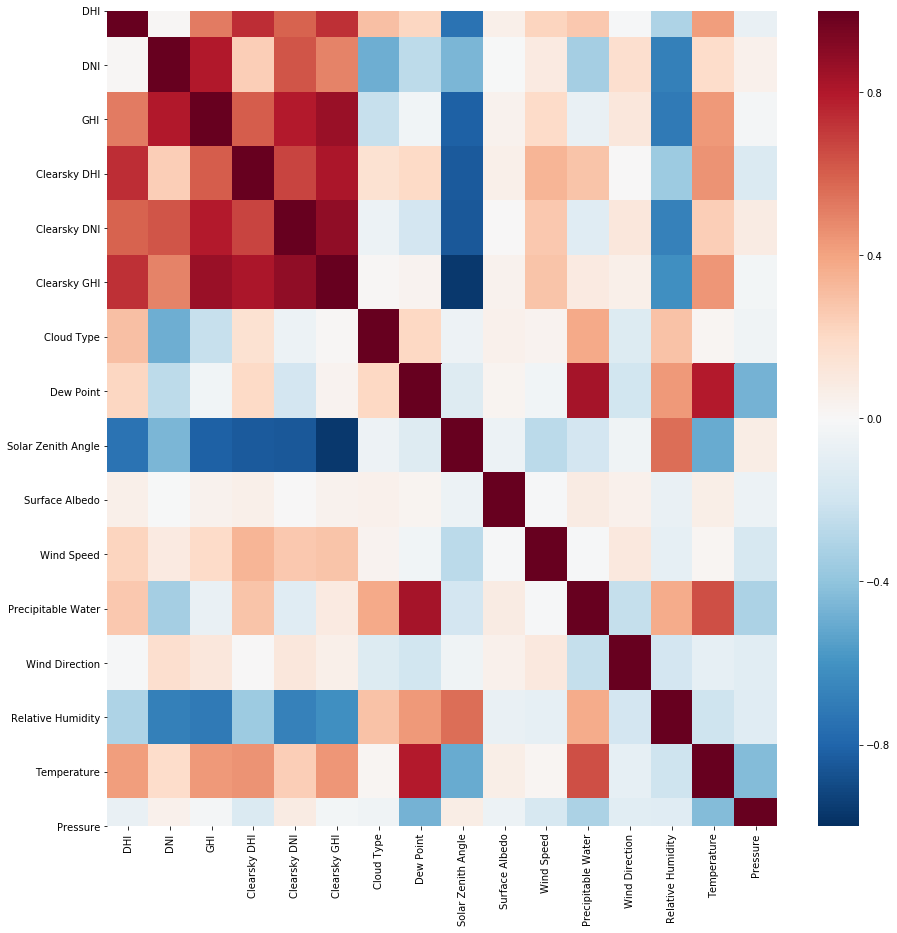

In [76]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(corr, cmap = "RdBu_r", ax=ax, vmin=-1.0, vmax =1.0)


In [77]:
col_no, row_no = corr.shape
for i in range(col_no):
    for j in range(i+1, row_no):
        if corr.iloc[i,j]>0.8:
            print(corr.columns[i]+' and '+corr.columns[j]+' is correlated.')
            print('Pearson correalation value: '+str(corr.iloc[i,j]))

GHI and Clearsky GHI is correlated.
Pearson correalation value: 0.8617945236710863
Clearsky DHI and Clearsky GHI is correlated.
Pearson correalation value: 0.8190136801202085
Clearsky DNI and Clearsky GHI is correlated.
Pearson correalation value: 0.8892984898888945
Dew Point and Precipitable Water is correlated.
Pearson correalation value: 0.8283125191008631


In [79]:
year_2018_df.columns

Index(['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar'],
      dtype='object')

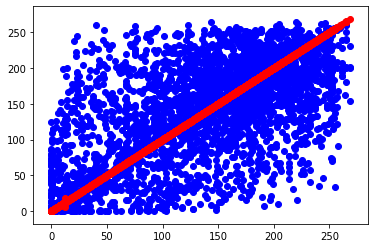

In [86]:
train,test=train_test_split(year_2018_df,test_size=0.5,random_state=100)
feature_list=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI','Relative Humidity','Solar Zenith Angle']
X_train = train[feature_list].values
y_train = train['Solar'].values
DT.fit(X_train, y_train)

X_test = test[feature_list].values
y_test = test['Solar'].values

plt.scatter(DT.predict(X_test),y_test, color='blue')
plt.scatter(DT.predict(X_train),y_train, color='red')



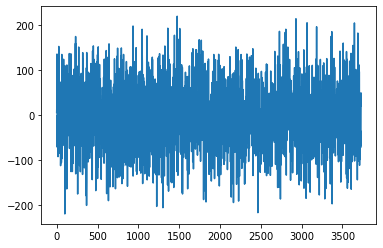

In [81]:
plt.plot(DT.predict(X_test)-y_test)

In [82]:
train.columns

Index(['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar'],
      dtype='object')

In [104]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1)

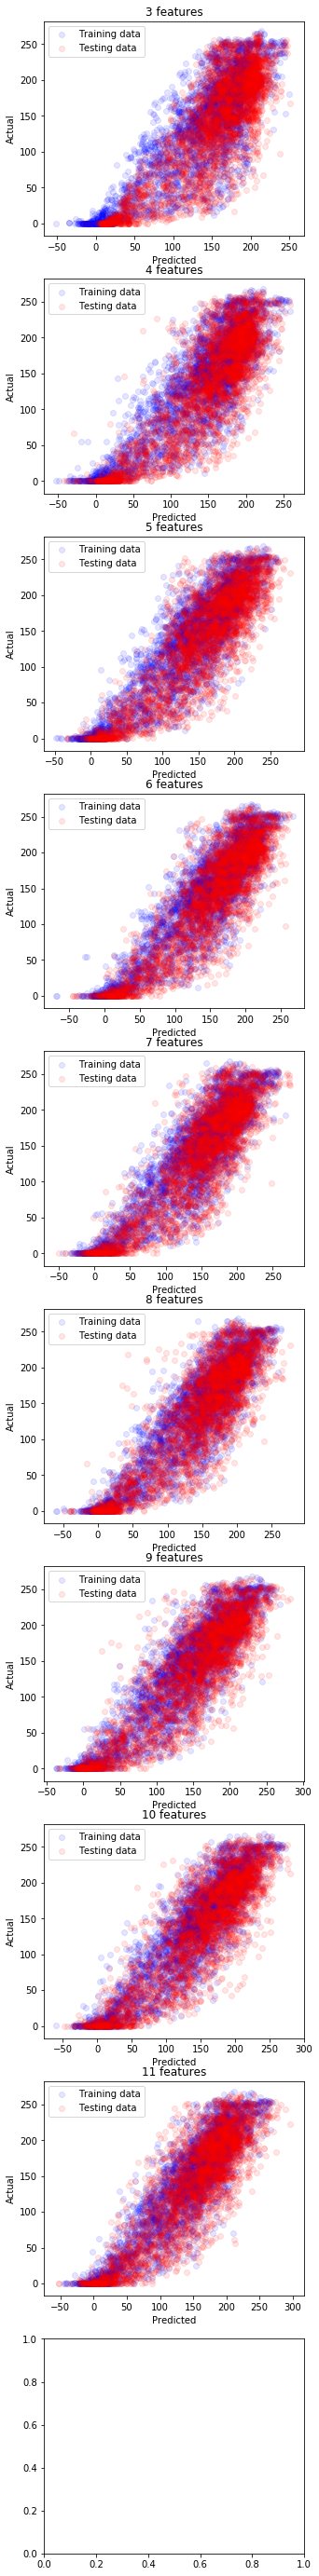

In [111]:

ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(year_2018_df,test_size=0.5,random_state=100)

scaler = preprocessing.StandardScaler()
fig, axs = plt.subplots(10, 1, figsize=(5,50))

for i in range(3,len(ranked_list)):
    feature_list = ranked_list[:i+1]
    X_train = train[feature_list].values
    y_train = train['Solar'].values
    X_test = test[feature_list].values
    y_test = test['Solar'].values
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.fit_transform(X_test)
    clf = MLPRegressor(solver='lbfgs')
    clf.fit(X_train_standardized,y_train)
    axs[i-3].scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
    axs[i-3].scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
    axs[i-3].set_title(str(i)+' features')
    axs[i-3].set_xlabel('Predicted')
    axs[i-3].set_ylabel('Actual')
    axs[i-3].legend(('Training data', 'Testing data'))

/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.4484858997500545 3
0.674157357966103 3


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5087153259327907 4
0.7452186002556426 4


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6127579189320405 5
0.7755822031118037 5


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5797705333252332 6
0.7869645876296961 6


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6051027550472619 7
0.8105302939450032 7


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5845581875986596 8
0.8048022523680762 8


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5988129711590011 9
0.7934953923871984 9


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5799660160847644 10
0.8160298057253126 10


/home/giang/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5703949956335206 11
0.8070245554980159 11


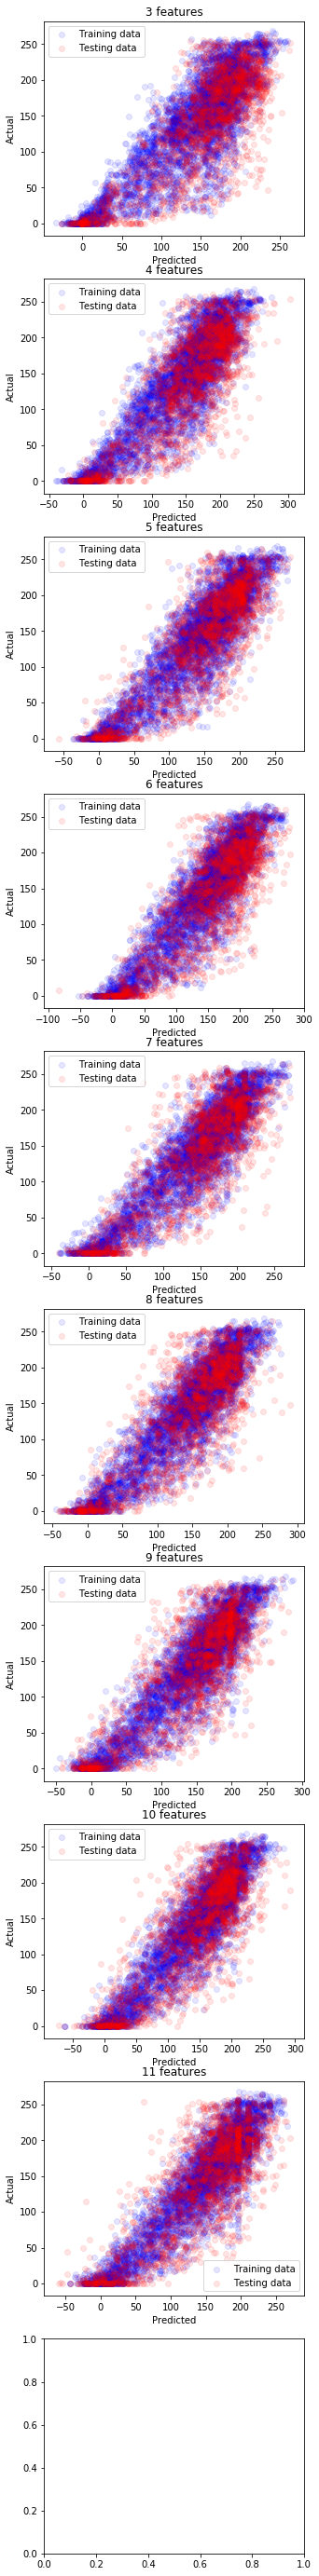

In [123]:

ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(year_2018_df,test_size=0.3,random_state=100)

scaler = preprocessing.StandardScaler()
fig, axs = plt.subplots(10, 1, figsize=(5,50))

for i in range(3,len(ranked_list)):
    feature_list = ranked_list[:i+1]
    X_train = train[feature_list].values
    y_train = train['Solar'].values
    X_test = test[feature_list].values
    y_test = test['Solar'].values
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.fit_transform(X_test)
    clf = MLPRegressor(solver='lbfgs',activation='logistic')
    clf.fit(X_train_standardized,y_train)
    axs[i-3].scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
    axs[i-3].scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
    axs[i-3].set_title(str(i)+' features')
    axs[i-3].set_xlabel('Predicted')
    axs[i-3].set_ylabel('Actual')
    axs[i-3].legend(('Training data', 'Testing data'))
    print(str(r2_score(clf.predict(X_test_standardized),y_test))+' '+str(i))
    print(str(r2_score(clf.predict(X_train_standardized),y_train))+' '+str(i))

In [118]:
from sklearn.metrics import r2_score
r2_score(clf.predict(X_test_standardized),y_test)

0.5672452199769846

In [119]:
r2_score(clf.predict(X_train_standardized),y_train)

0.835837656028676

In [103]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']



['Relative Humidity']
['Relative Humidity', 'Solar Zenith Angle']
['Relative Humidity', 'Solar Zenith Angle', 'GHI']
['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo']
['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo', 'Wind Direction']
['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo', 'Wind Direction', 'Temperature']
['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo', 'Wind Direction', 'Temperature', 'Wind Speed']
['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo', 'Wind Direction', 'Temperature', 'Wind Speed', 'DNI']
['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo', 'Wind Direction', 'Temperature', 'Wind Speed', 'DNI', 'DHI']
['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo', 'Wind Direction', 'Temperature', 'Wind Speed', 'DNI', 'DHI', 'Dew Point']
['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo', 'Wind Direction', 'Temperature', 'Wind Speed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca80757790>,
      dtype=object)

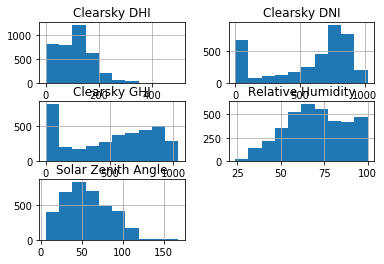

In [90]:
train[feature_list].hist()

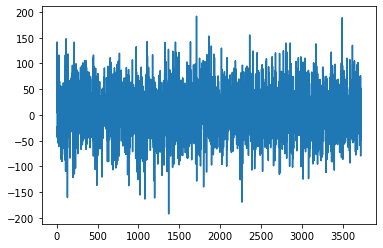

In [116]:
plt.plot(clf.predict(X_test_standardized)-y_test)

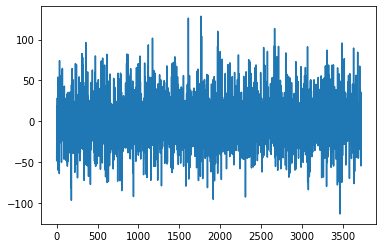

In [117]:
plt.plot(clf.predict(X_train_standardized)-y_train)

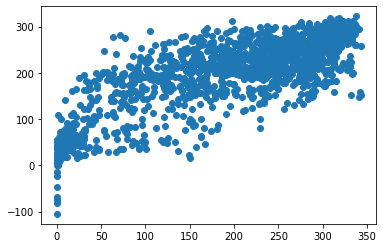

In [35]:
plt.scatter(y_test,y_fit)

In [25]:
X

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
83691,304,573,849,198,776,936,0,20.1,18.07,0.17,5.2,4.1,154.0,51.50,31.3,1015.0
83953,116,639,454,107,712,483,0,17.9,58.11,0.17,4.3,2.9,158.0,48.39,30.0,1010.0
89163,1,0,1,2,7,2,7,-0.3,91.50,0.15,3.8,0.9,341.0,71.17,4.5,1028.0
80646,72,891,483,72,891,483,0,-3.1,62.51,0.14,2.8,0.7,354.0,38.86,10.3,1030.0
83609,328,615,921,144,911,1022,7,12.1,15.36,0.17,3.5,1.7,132.0,37.81,27.8,1017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88546,32,0,32,40,462,107,8,14.5,81.61,0.15,1.5,3.1,27.0,80.41,17.9,1016.0
89408,144,632,490,86,860,557,0,11.1,56.83,0.14,1.8,1.8,86.0,62.46,18.4,1019.0
90273,85,912,631,85,912,631,0,9.5,53.21,0.14,2.8,1.5,10.0,54.55,18.9,1021.0
80623,17,217,24,17,217,24,0,-2.5,88.14,0.14,2.3,0.6,348.0,58.86,4.9,1021.0
